In [10]:
#!pip install seaborn
import sympy as sym
from sympy import apart

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sym.init_printing()
%matplotlib inline
# %matplotlib notebook

# Respuesta dinámica

Ya se ha establecido que el primer paso para analizar un sistema es obtener un modelo.

En el área de la **ingeniería de control**, se configura una base de comparación del comportamiento de sistemas controlados contra señales de prueba particulares.

## Señales de prueba

Las señales de prueba más comunes corresponden a funciones impulso, escalón, rampa, parábola, etc.

Como ya se ha estudiado, la respuesta ante la señal impulso permite caracterizar completamente al sistema, sin embargo, no es posible obtener esta señal en laboratorio.

La señal de prueba más apropiada para un sistema debe determinarse por la forma más frecuente de las excitaciones en su operación normal.

### Impulso
Entendido como la derivada del escalón.
\begin{equation}
    \delta(t) = \frac{d\epsilon}{dt}    
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ \delta(t) \} = 1    
\end{equation}

Determina completamente el comportamiento del sistema.

### Escalón
\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  1 & t > 0 \end{cases}
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ \epsilon(t) \} = \frac{1}{s}  
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan mantener variables fijas.

### Rampa
Entendida como la integral del escalón.

\begin{equation}
    rampa(t) = \int_{-\infty}^{t} \epsilon(\tau) d\tau = t \cdot \epsilon(t) 
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ rampa(t) \} = \frac{1}{s^2}
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan variables que cambian con velocidad constante.

### Parábola
Entendida como la integral de la rampa.

\begin{equation}
    parabola(t) = \int_{-\infty}^{t} rampa(\tau) d\tau   = \frac{t^2}{2} \cdot \epsilon(t)  
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ parabola(t) \} = \frac{1}{s^3}  
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan variables que cambian con aceleración constante.


## Respuesta transitoria y respuesta estacionaria

Cuando un [sistema estable](https://en.wikipedia.org/wiki/BIBO_stability) es excitado en el instante $t=0$, este responde de manera continua (respuesta transitoria) desde un estado inicial relacionado con las condiciones iniciales hasta que logra equilibrio (respuesta estacionaria).


![RespuestaDinamica](figuras/RespuestaDinamica.png)

## Sistemas de primer orden

Considere la siguiente función de transferencia:

![bloque](figuras/bloque_frecuencia.PNG)

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{a}{b s + c}
\end{equation}

Este sistema tiene $3$ parámetros ($a$, $b$ y $c$), sin embargo, para facilitar el análisis de estos sistemas puede transformarse la función a su forma canónica al dividir numerador y denominador por $c$.

\begin{equation}
G(s) = \frac{C(s)}{R(s)}  = \frac{\frac{a}{c}}{\frac{b}{c} s + \frac{c}{c}}= \frac{k}{\tau s + 1}
\end{equation}


En la forma canónica, se definen los parámetro como:
- $k$: ganancia en estado estacionario.
- $\tau$: constante de tiempo.

### Respuesta al escalón

Si el sistema es excitado con un escalón unitario, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k}{\tau s + 1} \cdot \frac{1}{s}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{\tau}{\tau s + 1} \right )
\end{equation}

La transformada inversa de Laplace permite obtener una expresión para la señal de salida en el dominio del tiempo $c(t)$.

\begin{equation}
c(t)= k \left ( 1 - e^{-t/\tau} \right ) \epsilon(t)
\end{equation}

Observe que:

- $c(t<0)=0$ (condción inicial).
- $\lim_{t\rightarrow \infty} c(t)=k$ (respuesta estacionaria).
- La respuesta transitoria es dominada por $e^{-t/\tau}$.
- $c(\tau) = 0.632k$, el sistema alcanza el $63.2\%$ del valor final después de un tiempo $\tau$.
- $c(2\tau) = 0.865k$, el sistema alcanza el $86.5\%$ del valor final después de un tiempo $2\tau$.
- $c(3\tau) = 0.95k$, el sistema alcanza el $95\%$ del valor final después de un tiempo $3\tau$.
- $\frac{dc}{dt}\big\vert_{t = 0^+} = \frac{d}{dt} \left ( k \left ( 1 - e^{-t/\tau} \right ) \right ) \big\vert_{t = 0^+} = \frac{k}{\tau}  e^{-t/\tau} \big\vert_{t = 0^+} =\frac{k}{\tau}$
- El sistema tiene un polo ubicado en $s=\frac{-1}{\tau}$


In [19]:
k, tau = sym.symbols('k, tau',real=True, positive=True)
t = sym.symbols('t',real=True, positive=True)

s = sym.Symbol('s')

def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sym.inverse_laplace_transform(F, s, t)

In [20]:
# la entrada r(t) es escalon unitario
r = sym.Heaviside(t)
r

In [21]:
# la entrada R(s) es la transformada de Laplace de r(t)
R = L(r)
R

In [23]:
# Se define la función de transferencia del sistema G(s)
G = k/(tau*s + 1)
g =invL(G)
g

In [24]:
# la salida se calcula como C(s) = G(s)R(s)
C = G*R
C

In [25]:
# la salida c(t) es la transformada inversa de Laplace de C(s)
c = invL(C)
c

Hasta este punto se ha encontrado la respuesta general de un sistema de primer orden ante una entrada escalón. Se recomienda variar los parámetros del sistema para identificar cómo varía su comportamiento.

In [26]:
# Para valores particulares de k y tau
K = 3
T = 25
kt = {k: K, tau: T}
ckt = c.subs(kt)
ckt

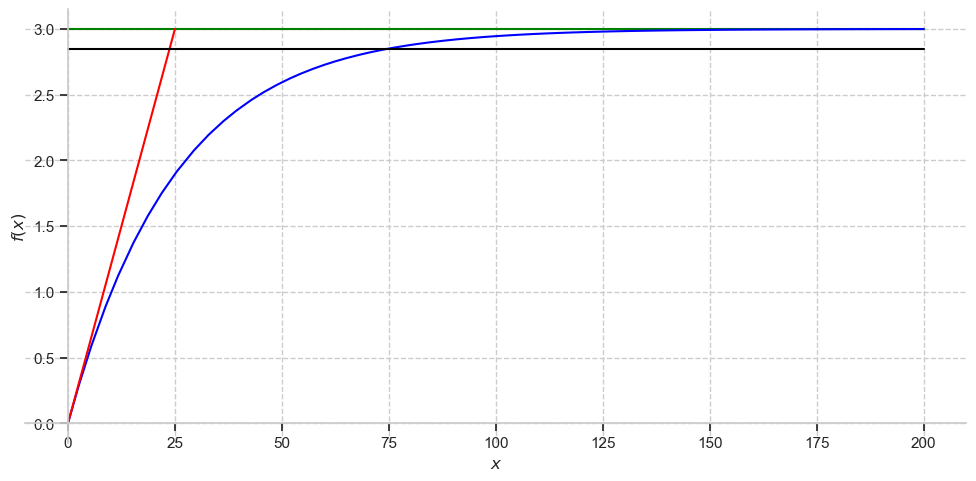

In [27]:
plt.rcParams['figure.figsize'] = 10, 5
g0 = sym.plot(K,(t,0,200),show = False, line_color='green');
g1 = sym.plot(ckt, (t,0,200),show = False, line_color='blue')
g2 = sym.plot(t*K/T,(t,0,T),show = False, line_color='red');
g3 = sym.plot(0.95*K, (t,0,200),show = False, line_color='black')
g0.extend(g1)
g0.extend(g2)
g0.extend(g3)
g0.show()
kt

### Respesta ante la rampa

Si el sistema es excitado con una rampa unitaria, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k}{\tau s + 1} \cdot \frac{1}{s^2}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s^2} - \frac{\tau}{s} + \frac{\tau^2}{\tau s + 1} \right )
\end{equation}

La transformada inversa de Laplace permite obtener una expresión para la señal de salida en el dominio del tiempo $c(t)$.

\begin{equation}
c(t)= k \left ( t - \tau + \tau e^{-t/\tau} \right ) \epsilon(t)
\end{equation}

Observe que:

- $c(t)$ se compone de una rampa ($t$), una constante ($\tau$) y una exponencial ($\tau e^{-t/\tau}$).
- $c(t<0)=0$ (condción inicial).
- A medida que $t\rightarrow \infty$, $\tau e^{-t/\tau} \rightarrow 0$, por lo que $\lim_{t\rightarrow \infty} c(t)=k \left ( t - \tau \right )$, es decir hace un seguimiento de la rampa con una desviación que depende de $k$ y $\tau$.

- $\lim_{t\rightarrow \infty} \frac{dc}{dt} = \lim_{t\rightarrow \infty} k \left (1 - e^{-t/\tau} \right ) = k$



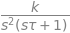

In [28]:
# la salida se calcula como C(s) = G(s)R(s)
C_ramp = G*(1/s**2)
C_ramp

In [29]:
# la salida c_ramp(t) es la transformada inversa de Laplace de C(s)
c_ramp = invL(C_ramp)
c_ramp

In [30]:
# Para valores particulares de k y tau
K = 0.9
T = 1
kt = {k: K, tau: T}
c_rampkt = c_ramp.subs(kt)
c_rampkt

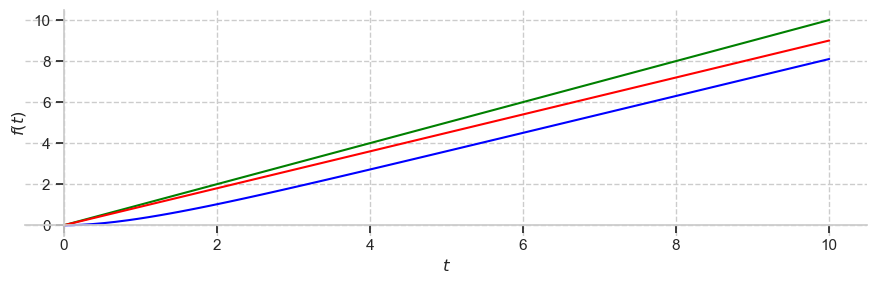

In [31]:
plt.rcParams['figure.figsize'] = 9, 3
g0 = sym.plot(t,(t,0,10),show = False, line_color='green');
g1 = sym.plot(c_rampkt, (t,0,10),show = False, line_color='blue')
g2 = sym.plot(t*K,(t,0,10),show = False, line_color='red');
g0.extend(g1)
g0.extend(g2)
g0.show()
kt

interactive(children=(FloatSlider(value=0.5, description='tau_in', max=3.0, min=-2.0), FloatSlider(value=0.0, …

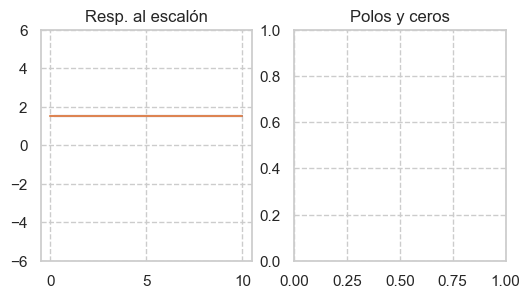

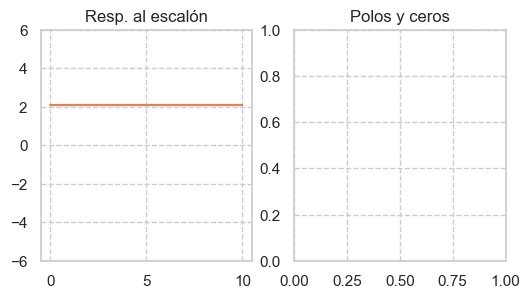

In [32]:
from ipywidgets import interact

evalfimpulse = sym.lambdify((k, tau, t), g , 'numpy')
evalfstep = sym.lambdify((k, tau, t), c, 'numpy')
evalframp = sym.lambdify((k, tau, t), c_ramp, 'numpy')

ts = np.linspace(0, 10)
def orden1(tau_in, K_in):
    plt.figure(figsize=(7, 5))
    ax_impulse = plt.subplot2grid((3, 2), (0, 0))
    ax_step = plt.subplot2grid((3, 2), (1, 0))
    ax_ramp = plt.subplot2grid((3, 2), (2, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    
    ax_impulse.plot(ts, evalfimpulse(K_in, tau_in, ts))
    ax_impulse.set_title('Resp. al impulso')
    ax_impulse.set_ylim(0, 10)
    
    tau_height = 1 - np.exp(-1)
    ax_step.set_title('Resp. al escalón')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts),ts,K_in*ts**0)
    ax_step.set_ylim(0, 10)
    
    ax_ramp.set_title('Resp. a la rampa')
    ax_ramp.plot(ts, evalframp(K_in, tau_in, ts),ts,K_in*ts)
    ax_ramp.set_ylim(0, 100)

    
    ax_complex.set_title('Polos y ceros')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-10, 10, -10, 10])

    
    
def orden11(tau_in, K_in):
    plt.figure(figsize=(6, 3))
    ax_step = plt.subplot2grid((1, 2), (0, 0))
    ax_complex = plt.subplot2grid((1, 2), (0, 1), rowspan=2)
    
    
    tau_height = 1 - np.exp(-1)
    ax_step.set_title('Resp. al escalón')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts),ts,K_in*ts**0)
    ax_step.set_ylim(-6, 6)
    
    ax_complex.set_title('Polos y ceros')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-5, 5, -5, 5])

interact(orden11, tau_in=(-2.0, 3.0), K_in=(-5.0, 5.0));

Una vez analizadas las simulaciones anteriores, comparta sus ideas para obtener modelos de primer orden de forma experimental.

## Sistemas de segundo orden

Considere la siguiente función de transferencia:

![bloque](figuras/bloque_frecuencia.PNG)

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{a}{b s^2 + c s + d}
\end{equation}

Este sistema tiene $4$ parámetros ($a$, $b$, $c$ y $d$), sin embargo, para facilitar el análisis de estos sistemas, puede transformarse la función a su forma canónica al dividir numerador y denominador por $b$.

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{\frac{a}{b}}{\frac{b}{b} s^2 + \frac{c}{b} s + \frac{d}{b}} = \frac{k\omega_0^2}{s^2 + 2 \zeta\omega_0s + \omega_0^2}
\end{equation}

En la forma canónica, se definen los parámetro como:
- $k$: ganancia en estado estacionario.
- $\omega_0$: frecuencia natural.
- $\zeta$: coeficiente de amortiguación.

Considerando que el sistema es estable, puede observarse que:
- Este sistema no tiene **ceros**, pues no existe un valor de $s$ que haga que el numerador $k\omega_0^2$ sea igual a cero.
- El sistema tiene dos **polos** ubicados en 

$$s_1,s_2 =-\zeta \omega_0 \pm \omega_0\sqrt{\zeta^2 - 1}$$

Así, deben considerarse 3 casos:
1. $\zeta < 1$, por lo cual $\sqrt{\zeta^2 - 1}$ arroja un parte imaginaria y el sistema tiene dos polos complejos conjugados. En este caso, el sistema es **subamortiguado**.

2. $\zeta = 1$, por lo cual $\sqrt{\zeta^2 - 1} = 0$ y el sistema tendría dos polos reales repetidos. En este caso, el sistema es **críticamente amortiguado**.

3. $\zeta > 1$, por lo cual $\sqrt{\zeta^2 - 1}$ arroja un parte real y el sistema tiene dos polos reales diferentes. En este caso, el sistema es **sobreamortiguado**.

### Caso subamortiguado

La función de transferencia del sistema es:

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{k\omega_0^2}{s^2 + 2 \zeta\omega_0s + \omega_0^2}
\end{equation}

En este caso se considera que $\zeta < 1$, por lo cual $\sqrt{\zeta^2 - 1}$ arroja un parte imaginaria y el sistema tiene dos polos complejos conjugados.

#### Respuesta al escalón

Si el sistema es excitado con un escalón unitario, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k\omega_0^2}{s^2 + 2 \zeta\omega_0s + \omega_0^2} \cdot \frac{1}{s}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{s + 2\zeta\omega_0}{s^2 + 2\zeta\omega_0s + \omega_0^2} \right )
\end{equation}

Suponiendo que la parte imaginaria de los polos es $\omega_d = \omega_0\sqrt{1-\zeta^2}$, la respuesta se puede reescribir como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{s + \zeta\omega_0}{(s+\zeta\omega_0)^2 + \omega_d^2} - \frac{\zeta\omega_0}{(s+\zeta\omega_0)^2 + \omega_d^2} \right )
\end{equation}

La transformada inversa de Laplace permite obtener una expresión para la señal de salida en el dominio del tiempo $c(t)$.

\begin{align}
c(t) &= k \left ( 1 - e^{-\zeta\omega_0 t} \cos{\omega_d t} - \frac{\zeta\omega_0}{\omega_d}e^{-\zeta\omega_0 t} \sin{\omega_d t}\right ) \epsilon(t) \\
&= k \left ( 1 - e^{-\zeta\omega_0 t} \cos{\omega_d t} - \frac{\zeta}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_0 t} \sin{\omega_d t}\right ) \epsilon(t) \\
&= k \left ( 1 - \frac{e^{-\zeta\omega_0 t}}{\sqrt{1-\zeta^2}} \sin \left (\omega_d t + \tan^{-1} \frac{\sqrt{1-\zeta^2}}{\zeta} \right )\right ) \epsilon(t) \\
&= k \left ( 1 - \frac{e^{-\zeta\omega_0 t}}{\sqrt{1-\zeta^2}} \sin \left (\omega_0 \sqrt{1-\zeta^2} t + \tan^{-1} \frac{\sqrt{1-\zeta^2}}{\zeta} \right )\right ) \epsilon(t) 
\end{align}

Observe que:

- $c(t<0)=0$ (condción inicial).
- $\lim_{t\rightarrow \infty} c(t)=k$ (respuesta estacionaria).
- La respuesta transitoria es dominada por $e^{-\zeta\omega_0 t}$ siendo modulada por una oscilación cuya frecuencia es $\omega_d = \omega_0 \sqrt{1-\zeta^2}$.
- Si $\zeta = 0 $, el sistema oscilaría eternamente.
- El sistema tiene dos polos ubicado en $s_1,s_2 =-\zeta \omega_0 \pm j \omega_d$

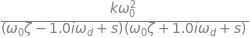

In [33]:
k, omega0, zeta, omegad = sym.symbols('k, omega_0, zeta, omega_d',real=True, positive=True)
t = sym.symbols('t',real=True, positive=True)
wd = {omegad : omega0*sym.sqrt(1-zeta**2)}

s = sym.Symbol('s')

G2_sub = k*omega0**2/((s + zeta*omega0 + omegad*1j)*(s + zeta*omega0 - omegad*1j))
G2_sub # La función de transferencia

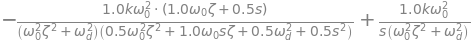

In [34]:
G2_sub_step = G2_sub*(1/s) # La respuesta ante el escalón
G2_sub_step = G2_sub_step.apart(s)   # Descompone larespuesta al escalón en fracciones parciales
G2_sub_step

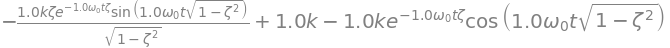

In [35]:
g2_sub_step = invL(G2_sub_step).subs(wd).factor().simplify()
g2_sub_step

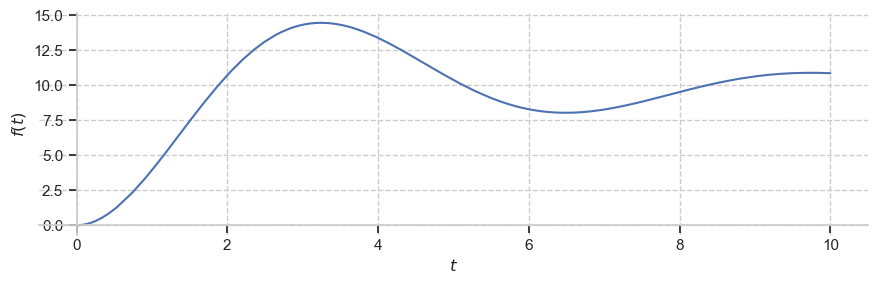

In [71]:
parametros = {k: 10,omega0: 1, zeta: 0.25}
sym.plot(g2_sub_step.subs(parametros),(t,0,10))


### Caso críticamente amortiguado

En este caso se considera que $\zeta = 1$, por lo cual $\sqrt{\zeta^2 - 1}$ arroja un parte imaginaria igual a cero polos reales repetidos. La función de transferencia del sistema queda:

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{k\omega_0^2}{s^2 + 2 \omega_0s + \omega_0^2} =  \frac{k\omega_0^2}{\left (s + \omega_0 \right )^2}  
\end{equation}


#### Respuesta al escalón

Si el sistema es excitado con un escalón unitario, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k\omega_0^2}{\left (s + \omega_0 \right )^2} \cdot \frac{1}{s}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{\omega_0}{\left ( s + \omega_0 \right )^2} - \frac{k}{s + \omega_0} \right )
\end{equation}

Aplicando la transformada inversa se obtiene:

\begin{align}
c(t) &= k \left ( 1 - \omega_0 t e^{-\omega_0 t} - e^{-\omega_0 t} \right ) \epsilon(t) \\
&= k \left ( 1 - (1 + \omega_0 t  )e^{-\omega_0 t} \right ) \epsilon(t) 
\end{align}


- $c(t<0)=0$ (condción inicial).
- $\lim_{t\rightarrow \infty} c(t)=k$ (respuesta estacionaria).
- La respuesta transitoria es dominada por $(1 + \omega_0 t  )e^{-\omega_0 t}$.
- El sistema tiene dos polos ubicados en $s_1,s_2 =-\omega_0$


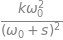

In [59]:
k, omega0 = sym.symbols('k, omega_0',real=True, positive=True)
t = sym.symbols('t',real=True, positive=True)

s = sym.Symbol('s')

G2_cri = k*omega0**2/(s + omega0)**2
G2_cri # La función de transferencia

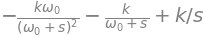

In [60]:
G2_cri_step = G2_cri*(1/s) # La respuesta ante el escalón
G2_cri_step = G2_cri_step.apart(s)   # Descompone larespuesta al escalón en fracciones parciales
G2_cri_step

In [61]:
g2_cri_step = invL(G2_cri_step).factor().simplify()
g2_cri_step

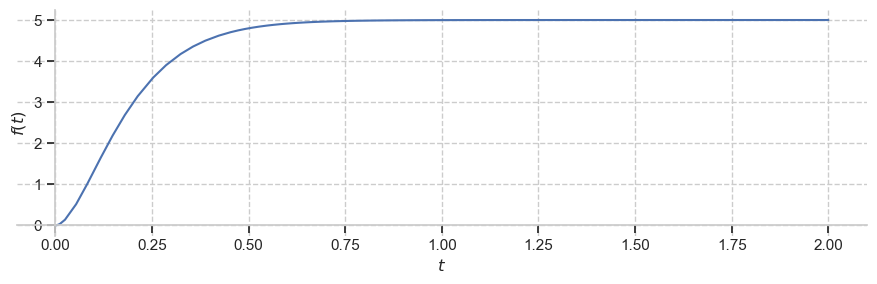

In [72]:
parametros = {k: 5,omega0: 10}
sym.plot(g2_cri_step.subs(parametros),(t,0,2))

### Caso sobreamortiguado

En este caso se considera que $\zeta > 1$, por lo cual $\sqrt{\zeta^2 - 1}$ arroja un parte imaginaria igual a cero y polos reales diferentes en $s_1,s_2 = \omega_0 (-\zeta  \pm \sqrt{\zeta^2 - 1})$. La función de transferencia del sistema queda:

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{k\omega_0^2}{s^2 + 2 \zeta \omega_0s + \omega_0^2} =  \frac{k s_1 s_2}{\left (-s + s_1 \right ) \left (-s + s_2 \right )}  
\end{equation}


#### Respuesta al escalón

Si el sistema es excitado con un escalón unitario, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k s_1 s_2}{\left (-s + s_1 \right ) \left (-s + s_2 \right )} \cdot \frac{1}{s}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{s_1}{s_1 - s_2}\frac{1}{s+s_2} + \frac{s_2}{s_1 - s_2}\frac{1}{s+s_1} \right )
\end{equation}

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} +  \frac{1}{s_1 - s_2} \left (  \frac{s_1}{s+s_2} + \frac{s_2}{s+s_1} \right )  \right )
\end{equation}

Aplicando la transformada inversa se obtiene:

\begin{equation}
c(t)= k \cdot \left ( 1 +  \frac{1}{s_1 - s_2} \left (s_1 e^{-s_2 t} +  s_2 e^{-s_1 t} \right )  \right )
\end{equation}


- $c(t<0)=0$ (condción inicial).
- $\lim_{t\rightarrow \infty} c(t)=k$ (respuesta estacionaria).
- La respuesta transitoria es dominada por dos exponenciales reales.
- El sistema tiene dos polos reales ubicados en $s_1,s_2 = \omega_0 (-\zeta  \pm \sqrt{\zeta^2 - 1})$


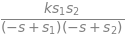

In [73]:
k, s1,s2,zeta,omega0 = sym.symbols('k, s_1, s_2,\zeta,\omega_0',real=True, positive=True)
t = sym.symbols('t',real=True, positive=True)

s = sym.Symbol('s')

G2_sob = k*s1*s2/((-s + s1)*(-s+s2))
G2_sob # La función de transferencia

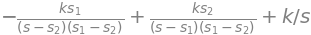

In [74]:
G2_sob_step = G2_sob*(1/s) # La respuesta ante el escalón
G2_sob_step = G2_sob_step.apart(s)   # Descompone larespuesta al escalón en fracciones parciales
G2_sob_step

In [75]:
g2_sob_step = invL(G2_sob_step).factor().simplify()
g2_sob_step

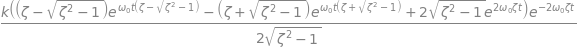

In [76]:
s1s2 = {s1: omega0*(-zeta + sym.sqrt(zeta**2-1)) ,s2:  omega0*(-zeta - sym.sqrt(zeta**2-1))}
# \omega_0 (-\zeta  \pm \sqrt{\zeta^2 - 1})
g2_sob_step = g2_sob_step.subs(s1s2).simplify()
g2_sob_step

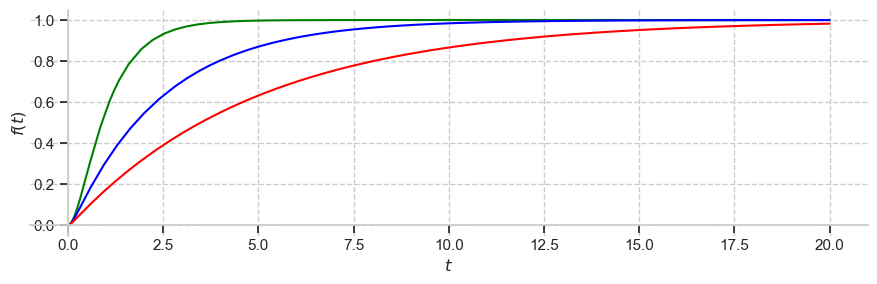

In [85]:
parametros1 = {k: 1.0,omega0: 2.0, zeta: 1.1}
parametros2 = {k: 1.0,omega0: 2.0, zeta: 2.5}
parametros3 = {k: 1.0,omega0: 2.0, zeta: 5}

g1 = sym.plot(g2_sob_step.subs(parametros1),
              (t,0,20),show=False,line_color='green')
g2 = sym.plot(g2_sob_step.subs(parametros2),
              (t,0,20),show=False, line_color='blue')
g3 = sym.plot(g2_sob_step.subs(parametros3),
              (t,0,20),show=False, line_color='red')
g1.extend(g2)
g1.extend(g3)
g1.show()

**Pregunta**
¿Qué esperaría que ocurra si el coeficiente de amoriguamiento de un sistema de segundo orden es "muy grande"?